## **SVMs**

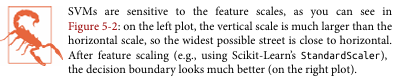

They're also sensitive to outliers and linearly unseparable spaces.

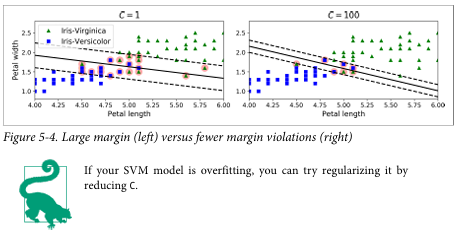

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [2]:
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]
y = (iris["target"] == 2).astype(np.float64)

svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge"))
])

svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [3]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

Polynomial kernel is very easy to interpret.<br>
RBF kernel (Gaussian Radial Based Function) is a bit trickier.<br>
For each datapoint it creates new features of 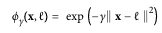

The closer the number is to 0 - the further apart the datapoints are, the closer it is to 1 - the closer the datapoints are.<br>
Working with distances makes space perfectly separable<br>

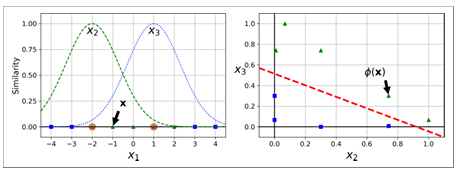

 You may wonder how to select the landmarks. The simplest approach is to create a
 landmark at the location of each and every instance in the dataset. This creates many
 dimensions and thus increases the chances that the transformed training set will be
 linearly separable. The downside is that a training set with m instances and n features
 gets transformed into a training set with m instances and m features (assuming you
 drop the original features). If your training set is very large, you end up with an
 equally large number of features

In [4]:
from sklearn.svm import SVC

In [11]:
rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=3, C=0.001))
])

rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=3))])

In [12]:
rbf_kernel_svm_clf.predict([[5.5, 1.7]])

array([0.])

**SVR - SVM for Regression Task**
it's more like a linear regression with a street and parameter to control it. ($\epsilon$ epsilon)
It penalizes when datapoints are out of the street and it also does support kernels

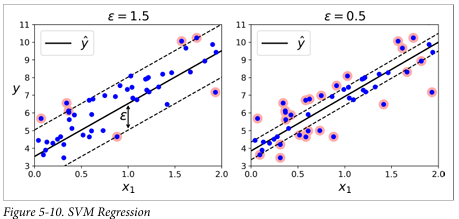

small epsilon (narrow street) makes model vulnerable to outliers and overfitting (because model is constantly anxious about not fitting points ideally)

In [13]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X, y)

SVR(C=100, degree=2, kernel='poly')